# Computer Vision fundamentals with the famous MNIST data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load data
original_data = pd.read_csv("train.csv")

original_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Separate data & labels
labels = original_data['label']
data = original_data.drop('label', axis=1)

In [4]:
labels

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [5]:
data

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
data.shape

(42000, 784)

In [7]:
labels.shape

(42000,)

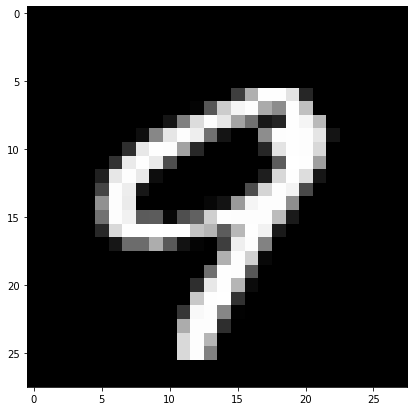

9

In [8]:
# Display a digit in pixel/handwritten format
plt.figure(figsize=(7,7))

#which data point?
idx = 100

img_matrix = data.iloc[idx].to_numpy().reshape(28,28)
plt.imshow(img_matrix, cmap='gray')
plt.show()

#print actual label
labels[idx]

In [9]:
# Lets do data pre-processing : Standardization of data (xi - mu)/(std-dev)

from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
standardized_data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [10]:
# Find the covariance matrix which is 1/n*(A^T * A)

# Matrix multiplication using numpy
covar_matrix = np.matmul(standardized_data.T, standardized_data)

covar_matrix.shape

(784, 784)

In [11]:
# Now, to project 784-d to 2-d, lets find Top 2 eigenvalues and corresponding eigenvectors

from scipy.linalg import eigh

# eigh function returns eigenvalues & eigenvectors in ascending order. So eigenvalues[0] is smallest & eigenvalues[783] is largest
# Since we only need top 2, we will request for 782 & 783th eigenvalues & eigenvectors

values, vectors = eigh(covar_matrix, eigvals=(782,783))

In [12]:
values

array([1222652.44613786, 1709211.41082575])

In [13]:
vectors
vectors.shape

(784, 2)

In [14]:
# To accomodate matrix operations (multiply vectors with data), we will transpose vectors 
# currently its 784 x 2, we want 2 x 784
vectors = vectors.T

vectors.shape

(2, 784)

In [15]:
# Lets find new coordinates of data by multiplying it with top 2 eigenvectors

new_coordinates = np.matmul(vectors, standardized_data.T)
new_coordinates.shape

(2, 42000)

In [16]:
# We can now plot this data in 2-D

In [17]:
# Before plotting, lets do some data massaging
# Append label to our resultant data
new_coordinates = np.vstack((new_coordinates,labels)).T

# Also, create a dataframe for plotting the labeled points
df = pd.DataFrame(new_coordinates, columns=("1st_principal", "2nd_principal", "label"))

df.head()

,1st_principal,2nd_principal,label
0,-5.226445,-5.140478,1.0
1,6.032996,19.292332,0.0
2,-1.705813,-7.644503,1.0
3,5.836139,-0.474207,4.0
4,6.024818,26.559574,0.0


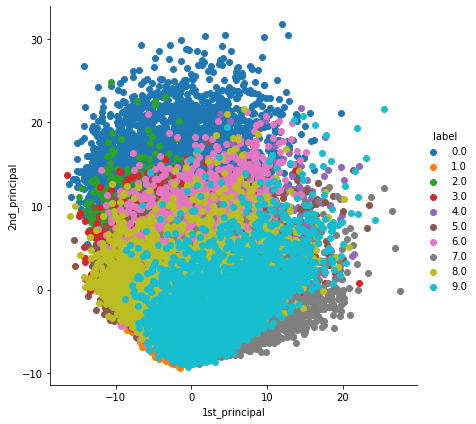

In [21]:
# Lets plot 2-D points using seaborn

import seaborn as sns

sns.FacetGrid(df, hue ="label", height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()

plt.show()

#### We can clearly see groupings for some labels. But some labels are still overlapping. We can say that PCA did decent job but not very good.
#### t-SNE could do much better job 

## Lets do same above operations using Scikit-Learn 

### A single line inbuilt function which does all above steps

In [27]:
from sklearn import decomposition

pca = decomposition.PCA()

In [28]:
# Lets configure parameters for PCA

pca.n_components = 2 # Set number of components as 2 
pca_data = pca.fit_transform(standardized_data)

In [29]:
pca_data.shape

(42000, 2)

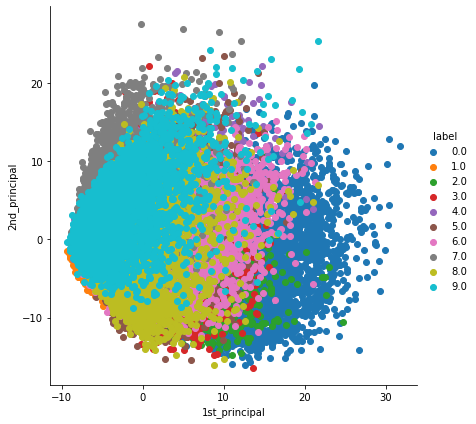

In [31]:
# Lets plot this pca_data
# Add labels to it
pca_data = np.vstack((pca_data.T,labels)).T

pca_df = pd.DataFrame(pca_data, columns=("1st_principal", "2nd_principal", "label"))

sns.FacetGrid(pca_df, hue ="label", height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()

plt.show()